In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Today's lecture: pie, bar, and scatter plots

In [3]:
import pandas as pd
from pandas import DataFrame, Series

In [35]:
import matplotlib
from matplotlib import pyplot as plt
#matplotlib.rcParams
#matplotlib.rcParams["font.size"]
matplotlib.rcParams["font.size"] = 18

In [5]:
import sqlite3
import os

In [6]:
# Series.plot.PLOT_FN(...)
# DataFrame.plot.PLOT_FN(...)
# Example PLOT_FNs: pie, scatter, bar, line

In [7]:
s = Series([5000000, 3000000, 2000000])
s
# Recall: 1. pandas Series can be made using list or dictionary
#         2. pandas Series has both index (similar to dictionary key) and integer position (similar to list index)
#         3. While creating a brand new list, index and integer position are the same

0    5000000
1    3000000
2    2000000
dtype: int64

In [8]:
%matplotlib inline
# Without this Jupyter notebook cannot display the "first" plot

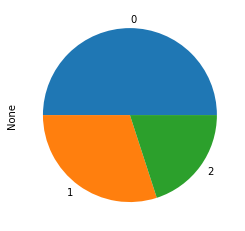

In [9]:
s.plot.pie()

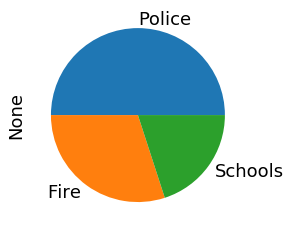

In [36]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
s.plot.pie() # Doesn't say the absolute numbers for each department

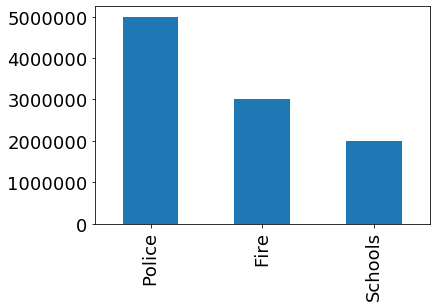

In [37]:
s.plot.bar()

Text(0.5, 1.0, 'Annual City Spending')

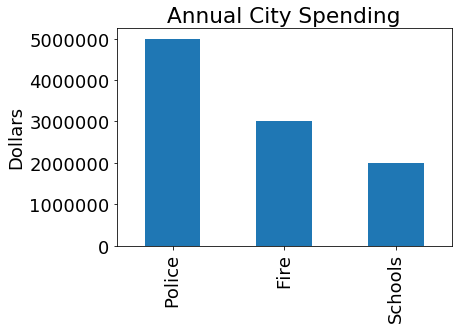

In [38]:
ax = s.plot.bar()
ax.set_ylabel("Dollars")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

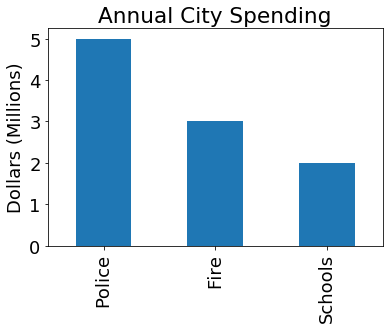

In [39]:
ax = (s / 1000000).plot.bar()
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

[Text(0, 0, 'Police'), Text(0, 0, 'Fire'), Text(0, 0, 'Schools')]

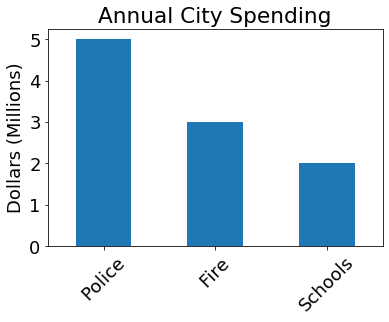

In [40]:
ax = (s / 1000000).plot.bar()
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
#s.index
ax.set_xticklabels(list(s.index), rotation = 45)

Text(0.5, 1.0, 'Annual City Spending')

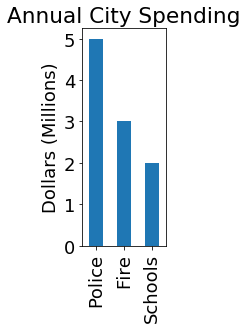

In [41]:
ax = (s / 1000000).plot.bar(figsize=(1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

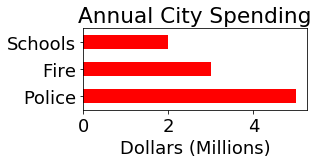

In [46]:
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="red")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

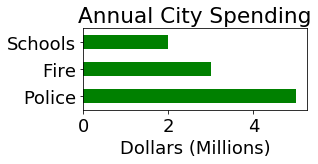

In [48]:
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="g")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

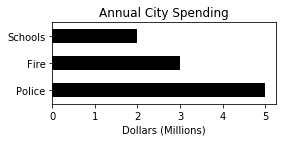

In [18]:
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="k")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

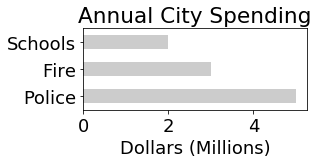

In [52]:
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="0.8")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

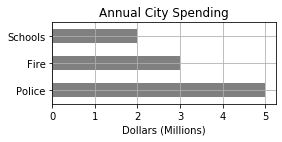

In [20]:
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.grid()

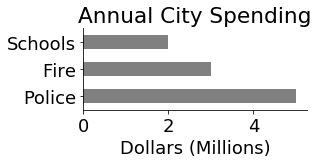

In [54]:
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
# ax.spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [22]:
#plt.subplots() # Returns a tuple

Text(0.5, 1.0, 'Annual City Spending')

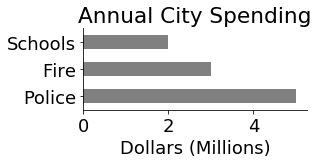

In [53]:
def get_ax(height = 3):
    #fig, ax = plt.subplots(figsize=(4, height)) # Tuple unpacking
    _, ax = plt.subplots(figsize=(4, height))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

ax = get_ax(1.5)
(s / 1000000).plot.barh(color="0.5", ax=ax)
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

In [56]:
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

In [57]:
# pd.read_sql(QUERY, CONNECTION)
pd.read_sql("""
SELECT * FROM sqlite_master
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [59]:
pd.read_sql("""
SELECT * FROM boarding LIMIT 10
""", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
5,5,1167,4,43.077867,-89.369993,2.23
6,6,1167,10,43.077867,-89.369993,0.11
7,7,1167,38,43.077867,-89.369993,1.36
8,8,1169,3,43.089707,-89.329817,18.90
9,9,1169,37,43.089707,-89.329817,1.35


In [60]:
# what are the top routes, and how many people ride them daily?

In [28]:
pd.read_sql("SELECT * FROM boarding LIMIT 3", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34


In [61]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)
df = df.set_index("Route")
# df
df.head()

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


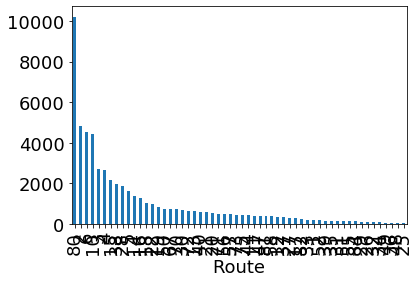

In [62]:
s = df["daily"]
s.plot.bar()

In [68]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
LIMIT 5
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


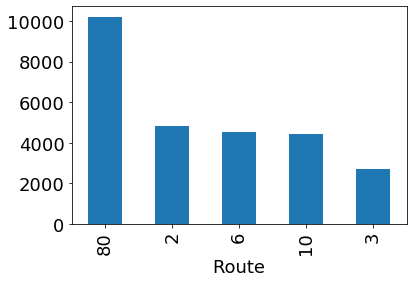

In [69]:
df = df.set_index("Route")
s = df["daily"]
s.plot.bar()

In [71]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)

df = df.set_index("Route")
s = df["daily"]
df.head()


,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


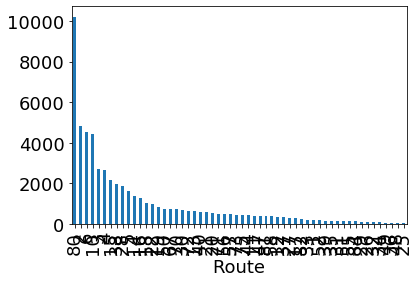

In [72]:
s.plot.bar()

In [63]:
s = df["daily"].iloc[:5]
s["other"] = df["daily"].iloc[5:].sum()
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: daily, dtype: float64

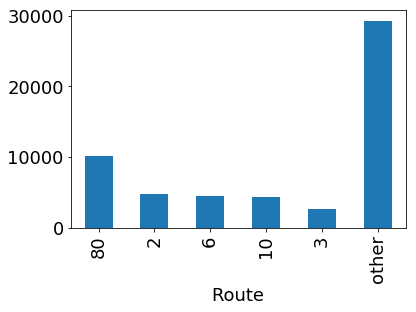

In [64]:
s.plot.bar()

Text(0, 0.5, 'Rides/Day (Thousands)')

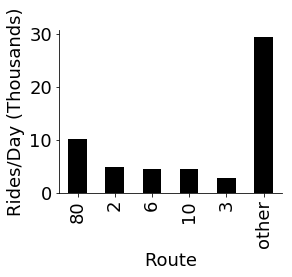

In [65]:
ax = get_ax()
(s/1000).plot.bar(color="k", ax=ax)
ax.set_ylabel("Rides/Day (Thousands)")
# Where did the xlabel come from? It comes from "set_index call on the dataframe"

In [73]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
df = DataFrame(trees)
df

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4
3,2,1.8,0.9
4,2,2.5,1.5
5,2,3.0,1.8
6,2,2.9,1.7
7,3,3.2,2.1
8,3,3.0,2.0
9,3,2.4,2.2


In [75]:
# s.plot.bar()
# index  => x-axis
# values => y-axis

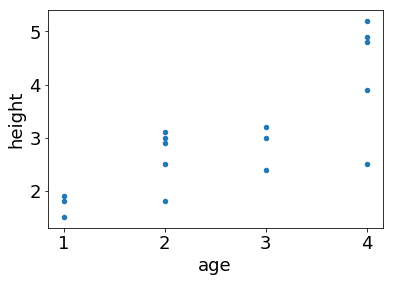

In [78]:
# df.plot.scatter (x = COLUMNNAME, y = COLUMNNAME)
df.plot.scatter(x="age", y="height")